In [1]:
import pandas as pd
import re 
import matplotlib.pyplot as plt
#import SRC.function as f

In [2]:
shark_df = pd.read_csv("INPUT/GSAF5.csv", engine="python")
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [3]:
#Check number of columns and samples from the dataset 
shape = shark_df.shape
print(f"Number of columns:{shape[1]}\nList of columns:{shark_df.columns}\nNumber of samples:{shape[0]}")

Number of columns:24
List of columns:Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
Number of samples:5992


In [4]:
#Check null values
nullvalues = shark_df.isnull().sum()
print(nullvalues)
#Select columns with a significant number of nullvalues (90%), which can be discarded. 
columns_to_eliminate = [col for col in shark_df.columns if shark_df[col].isnull().sum() >= (0.9*shape[0])]
print(F"{columns_to_eliminate} can be removed from the dataset")

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64
['Unnamed: 22', 'Unnamed: 23'] can be removed from the dataset


In [5]:
#Data provided by the columns to be removed, to check that this information is not relevant. 
display(shark_df[(shark_df["Unnamed: 22"].isnull()==False)|(shark_df["Unnamed: 23"].isnull()==False)])
#Remove columns 
shark_df = shark_df.drop(columns_to_eliminate, axis=1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,...,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,"Gerald Howard, on board sportsfishing boat Ter...",M,...,NaN,"L.A. Times, 7/14/1952",1952.07.13-Howard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.07.13,1952.07.13,1811,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,Cabin boy of the Bonnie Dundee,M,...,NaN,"Star, 3/22/1879",1879.03.10-Bonnie-Dundee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1879.03.10,1879.03.10,408,NaN,change filename


In [6]:
#Check duplicate columns. Similarities between href and href formula, as well as, Case Number, Case Number.1 and Case Number.2
def check_duplicates(a,b,threshold):
    if sum(a==b)>= threshold:
        return True
thr = 0.9*shape[0]
columns_duplicates = [("href","href formula"),("Case Number","Case Number.1"),("Case Number","Case Number.2")]
for col in columns_duplicates:
    if check_duplicates(shark_df[col[0]],shark_df[col[1]],thr)== True:
        shark_df = shark_df.drop(col[1], axis=1)
shark_df = shark_df.drop("original order", axis=1)
shark_df.head()
#No duplicates in this dataset
shark_df.drop_duplicates().shape

(5992, 18)

In [7]:
# I performed different analysis based on each column information 

,Type,Total
0,Boat,310
1,Provoked,557
2,Sea Disaster,220
3,Unknown,519
4,Unprovoked,4386


The percentage of unprovoked attacks:73.2


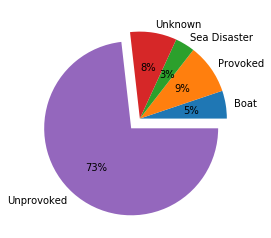

In [8]:
########## TYPE ############  
options = set(shark_df["Type"])
shark_df.Type = shark_df.Type.str.replace(r"Boat(.*)?","Boat")
shark_df.Type = shark_df.Type.str.replace(r"Invalid(.*)?","Unknown")
shark_df_type = shark_df.groupby("Type").agg({"Type":"count"})
shark_df_type =shark_df_type.rename(columns={"Type":"Total"})
d = dict(shark_df_type.Total)
shark_df_type = shark_df_type.reset_index()
display(shark_df_type)
p = round((d["Unprovoked"]/sum(d.values()))*100,2)
print(f"The percentage of unprovoked attacks:{p}")
plt.pie(shark_df_type['Total'], labels=shark_df_type['Type'],explode=(0, 0, 0, 0, 0.15), autopct='%1d%%')
plt.show()

The Country, where more shark attacks were registered, is USA with 2116 attacks
Area with more shark attacks: Florida
Location: New Smyrna Beach, Volusia County


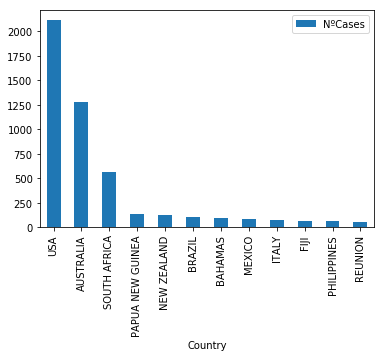

In [9]:
################## COUNTRY #################
shark_df.Country=shark_df.Country.fillna("UNKNOWN")
shark_df.Country=shark_df['Country'].apply(lambda x: x.upper())
shark_df.Country = shark_df.Country.str.replace(r"AA","A")
shark_df.Country = shark_df.Country.str.replace(r"(.+)\?","UNKNOWN")
shark_df.Country = shark_df.Country.str.replace(r"(.*)\s+/+\s(.*)","UNKNOWN")
shark_df_Country= pd.DataFrame(shark_df.Country.value_counts()).reset_index().rename(columns={"index":"Country","Country":"NºCases"})
shark_df_Country = shark_df_Country[(shark_df_Country["NºCases"] > 55)]
shark_df_Country.plot.bar(x="Country")
print(f"The Country, where more shark attacks were registered, is {shark_df_Country.Country[0]} with {shark_df_Country['NºCases'].max()} attacks")


## Estudiar dentro de USA la zona con mayor probabilidad de ataque
a = pd.DataFrame(shark_df[(shark_df['Country']=='USA')]['Area'].value_counts()).reset_index().rename(columns={'index':'Area', 'Area':'Cases'}).head()
b = pd.DataFrame(shark_df[(shark_df['Country']=='USA')&(shark_df['Area']=='Florida')]['Location'].value_counts()).reset_index()
print(f"Area with more shark attacks: {a['Area'][0]}\nLocation: {b['index'][0]}")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


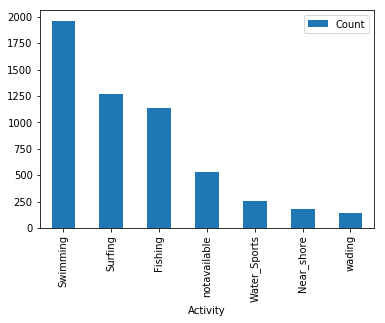

In [10]:
################## ACTIVITY ######################
shark_df.Activity=shark_df.Activity.fillna("NotAvailable")
shark_df.Activity=shark_df['Activity'].apply(lambda x: x.lower())
def SearchActivity(sequence,pattern):
    match = re.search(r"(.*)?"+pattern[0]+"(.*)?",sequence)
    if match:
        return pattern[1]
Swimming = ("swim|div|snork|bath|float","Swimming")
Fishing = ("fish|collec|lobster|sail","Fishing")
Water_Sports = ("boat|kayak|row|padd|cano|ski","Water_Sports")
Surfing = ("surf|kite|board","Surfing")
Near_shore = ("play|walk|climb|beach|jump|stand|film","Near_shore")
activities = [Swimming,Fishing,Water_Sports,Surfing,Near_shore]
act = []
for a in activities:
    act = shark_df['Activity'].apply(SearchActivity,pattern=a)
    for i in range(shark_df.shape[0]):
        if act[i]!=None:
            shark_df['Activity'][i]=act[i]
shark_df['Activity']
shark_df_activity = shark_df.groupby("Activity").agg({"Activity":"count"})
shark_df_activity =shark_df_activity.rename(columns={"Activity":"Count"})
shark_df_activity =shark_df_activity.sort_values("Count",ascending= False).reset_index()
shark_df_activity= shark_df_activity[(shark_df_activity.Count>100)]
shark_df_activity.plot.bar(x="Activity")

There are 126 unknown cases


,Year
decada,
1960,565
1970,326
1980,438
1990,627
2000,1024
2010,733


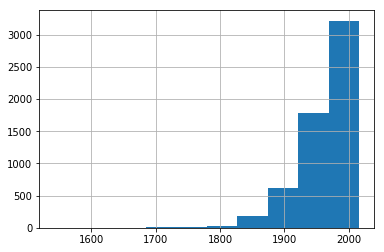

In [11]:
################### CASE NUMBER /DATE/ YEAR ########################
shark_df.sort_values("Year")
case_info = {}
case_info['Case'] = []
case_info['Year'] = []
case_info['Date']= []
index = 0
remove = []
for case in shark_df["Case Number"].values:
    res = re.findall(r"\d{4}\.\d{2}\.\d{2}[\.\w]*", case)
    res2 = re.findall(r"\d{4}", case)
    res3 = re.findall(r"\d{4}\.\d{2}\.\d{2}", case)
    if res:
        res3 = re.sub('\.','/',res3[0])
        case_info['Case'].append(res[0])
        case_info['Year'].append(int(res2[0]))
        case_info['Date'].append(res3)
    else:
        remove.append(index)
    index += 1
c_df = pd.DataFrame(case_info)
print(f"There are {shark_df.shape[0] - c_df.shape[0]} unknown cases")
c_df.sort_values("Year", ascending= True)
c_df = c_df.drop([5863, 5864, 5865],axis=0)
c_df.Year.hist()
c_df["decada"] = pd.cut(c_df.Year.where(c_df['Year']>1950),bins=[1960,1970,1980,1990,2000,2010,2020], labels=range(1960,2020,10))
display(c_df.groupby("decada").agg({"Year":"count"}))
shark_df = shark_df.drop(remove,axis=0)
#shark_df = shark_df.drop([5863, 5864, 5865],axis=0)
shark_df[['Date','Year']]= c_df[['Date','Year']]
#shark_df = shark_df.drop('Case Number',axis=1)

([<matplotlib.patches.Wedge at 0x7ff457d5a390>,
 [Text(0.905101566622012, 0.9331619120486968, 'FATAL'),
  Text(-0.816565276199003, -0.7370353788700011, 'NONFATAL'),
  Text(1.0975752672824082, -0.07299679890207766, 'UNKNOWN')],
 [Text(0.5569855794596996, 0.5742534843376595, '25%'),
  Text(-0.44539924156309246, -0.4020192975654551, '72%'),
  Text(0.5986774185176772, -0.03981643576476963, '2%')])

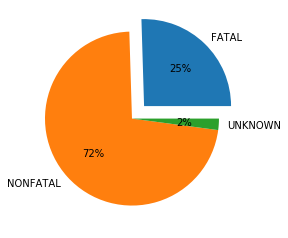

In [12]:
################### FATALITY #######################
shark_df = shark_df.rename(columns = {"Fatal (Y/N)":"Fatality"})
shark_df.Fatality = shark_df.Fatality.fillna("UNKNOWN")
def SearchYes(arr):
    if arr == 'Y' :
        return "Fatal"
    elif arr == 'N' :
        return "NonFatal"
option = {}
option['FATAL'] = sum(shark_df['Fatality'].apply(SearchYes)=="Fatal")
option['NONFATAL'] = sum(shark_df['Fatality'].apply(SearchYes)=="NonFatal")
option['UNKNOWN'] = shark_df.shape[0] - option['FATAL'] - option['NONFATAL']
plt.pie(option.values(), labels=option.keys(),explode=(0.20, 0, 0), autopct='%1d%%')


([<matplotlib.patches.Wedge at 0x7ff457d7b150>,
 [Text(-1.067531077430182, 0.7418742472419129, 'MALE'),
  Text(0.6765878888861986, -0.86731126397189, 'FEMALE'),
  Text(1.0505496222526691, -0.3261065641546858, 'UNKNOWN')],
 [Text(-0.6569422014954966, 0.4565379983027156, '80%'),
  Text(0.3690479393924719, -0.47307887125739445, '9%'),
  Text(0.5730270666832741, -0.17787630772073768, '9%')])

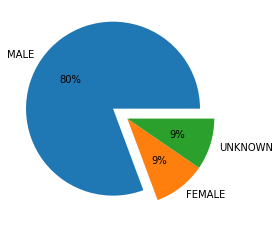

In [13]:
################## SEX ###############  Same procedure as before
shark_df = shark_df.rename(columns = {"Sex ":"Sex"})
shark_df.Sex = shark_df.Sex.fillna("UNKNOWN")
def SearchSex(arr):
    if arr == 'M' :
        return "Male"
    elif arr == 'F' :
        return "Female"
option = {}
option['MALE'] = sum(shark_df['Sex'].apply(SearchSex)=="Male")
option['FEMALE'] = sum(shark_df['Sex'].apply(SearchSex)=="Female")
option['UNKNOWN'] = shark_df.shape[0] - option['MALE'] - option['FEMALE']
plt.pie(option.values(), labels=option.keys(),explode=(0.20, 0, 0), autopct='%1d%%')

In [14]:
shark_df.Year = shark_df.Year.astype('str')
shark_df.Year = shark_df.Year.str.replace(r"\.\d","")
Shark_csv_filtered = shark_df.to_csv()
export_csv = shark_df.to_csv ('OUTPUT/Shark_export_df.csv', index = None, header=True) 

In [15]:
shark_df.where(shark_df['Year']>'2010').groupby("Fatality")["Sex"].value_counts()

Fatality  Sex    
N         M          527
          F          109
          UNKNOWN     26
          M            1
UNKNOWN   M            2
          F            1
Y         M           60
          F           10
          UNKNOWN      1
Name: Sex, dtype: int64

In [16]:
#Years of fatal attacks to mens which were surfing in florida
pd.DataFrame(shark_df.where((shark_df['Fatality']=='Y')&(shark_df['Sex']=='M')&(shark_df['Activity']=='Surfing')&(shark_df['Area']=='Florida'))["Year"].value_counts())

,Year
2010,1
1963,1
1883,1
1852,1


In [17]:
t = pd.DataFrame(shark_df.where((shark_df['Year']>'2010')&(shark_df['Sex']=='M')&(shark_df['Activity']=='Surfing'))["Fatality"].value_counts()).rename(columns ={"Fatality":"Male Fatality"})
w=pd.DataFrame(shark_df.where((shark_df['Year']>'2010')&(shark_df['Sex']=='F')&(shark_df['Activity']=='Surfing'))["Fatality"].value_counts()).rename(columns ={"Fatality":"Female Fatality"})
pd.concat([t,w],axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Male Fatality,Female Fatality
N,221,31.0
Y,19,NaN
